In [2]:
import cubic_spline_planner

ax = [0.0, 6.0, 12.5, 10.0, 17.5, 20.0, 25.0]
ay = [0.0, -3.0, -5.0, 6.5, 3.0, 0.0, 0.0]
goal = [ax[-1], ay[-1]]

cx, cy, cyaw, ck, s = cubic_spline_planner.calc_spline_course(
    ax, ay, ds=0.1)
target_speed = 10.0 / 3.6  # simulation parameter km/h -> m/s

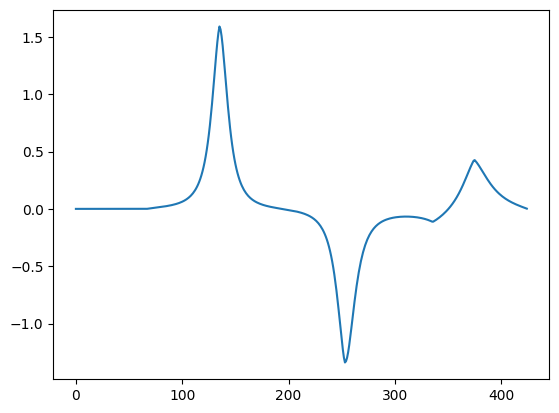

In [9]:
# plot cx and cy
import matplotlib.pyplot as plt
plt.plot(ck)

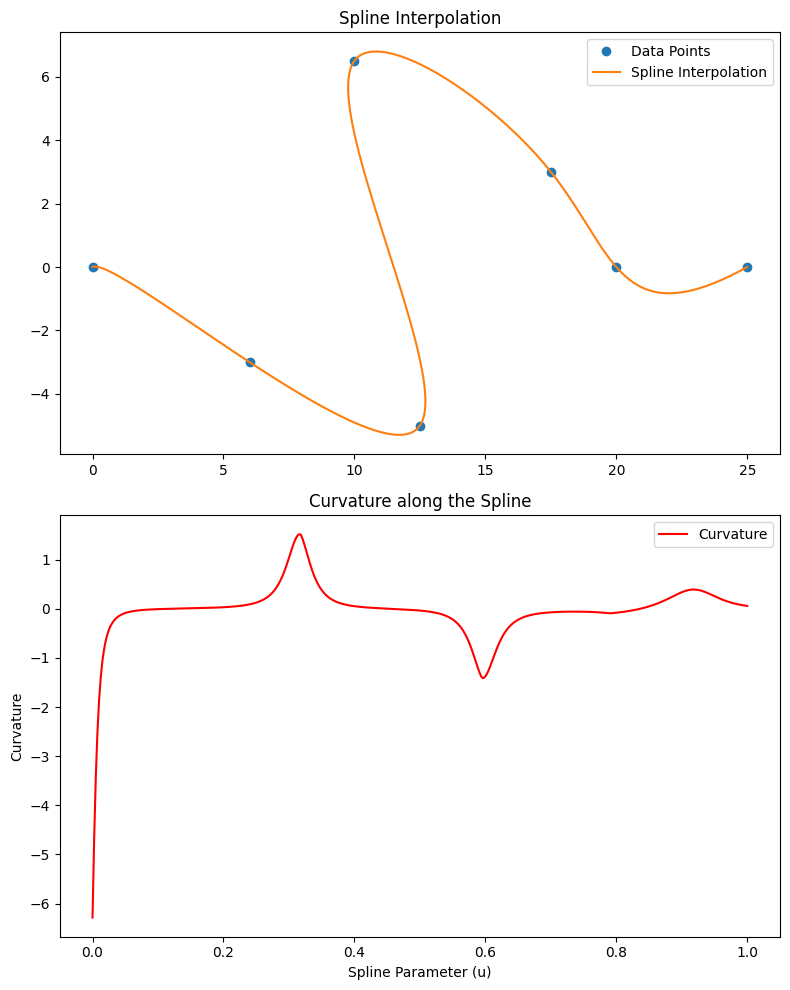

In [16]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt

# Example data points
x = np.array([0.0, 6.0, 12.5, 10.0, 17.5, 20.0, 25.0])
y = np.array([0.0, -3.0, -5.0, 6.5, 3.0, 0.0, 0.0])

# Fit spline to the data points
tck, u = splprep([x, y], s=0)

# Generate new points on the spline
u_fine = np.linspace(0, 1, 400)
x_spline, y_spline = splev(u_fine, tck)

# First and second derivatives of the spline
dx, dy = splev(u_fine, tck, der=1)
ddx, ddy = splev(u_fine, tck, der=2)

# Calculate curvature (allowing negative values)
curvature = (ddy * dx - ddx * dy) / ((dx ** 2 + dy ** 2)**(3 / 2))

# Plotting the spline and curvature
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot the spline
ax[0].plot(x, y, 'o', label='Data Points')
ax[0].plot(x_spline, y_spline, '-', label='Spline Interpolation')
ax[0].set_title('Spline Interpolation')
ax[0].legend()

# Plot the curvature
ax[1].plot(u_fine, curvature, label='Curvature', color='r')
ax[1].set_title('Curvature along the Spline')
ax[1].set_xlabel('Spline Parameter (u)')
ax[1].set_ylabel('Curvature')
ax[1].legend()

plt.tight_layout()
plt.show()